# 도로 상황 분류 프로젝트

### 데이터 전처리2: Youtube 영상 이미지 데이터 (도로 부분만 crop)

* youtube 이미지 확인

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 224, 224)
(3, 224, 224)
(3, 224, 224)
(3, 224, 224)
(3, 224, 224)
(5, 3, 224, 224)
torch.Size([5, 3, 224, 224])
make_gird 후
torch.Size([3, 228, 1132])
<class 'torch.Tensor'>
(228, 1132, 3)


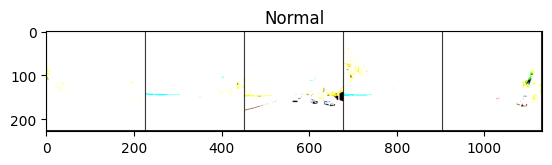

(3, 224, 224)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [102]:
import torch
import torchvision
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

youtube_images_path = 'D://Weather conditions driving classification data (YouTube)//images//'
class_names = ['Normal','Rainy','Snowy']

def image_grid(youtube_images_path):

    rand_idx = np.random.randint(0,5000,5)
    imgs = np.ndarray((0,3,224,224),int)

    for class_name in class_names:
        images_jpg = glob(youtube_images_path+class_name+"//*.jpg")
        for idx in rand_idx:
            img = Image.open(images_jpg[idx])
            img = img.resize((224,224))
            img = np.array(img)
            img = img.transpose((2,0,1))
            print(np.array(img).shape)
            imgs = np.append(imgs,[np.array(img)],axis=0)

        print(imgs.shape)
        imgs = torch.Tensor(imgs)
        print(imgs.shape)
        imgs = torchvision.utils.make_grid(imgs)
        print("make_gird 후")
        print(imgs.shape)
        print(type(imgs))
        imgs = imgs.numpy().transpose((1,2,0))
        print(imgs.shape)
        std = np.array([0.229,0.224,0.225])
        mean = np.array([0.485,0.456,0.406])

        # img = std*img+mean
        # img = np.clip(img,0,1)
        # print("clip 후 : ",img)

        plt.imshow(imgs)
        plt.title(class_name)
        plt.show()

image_grid(youtube_images_path)